# Inferential statistics
Often, we are not only interested in describing our data with descriptive statistics like the mean and standard deviation, but want to know whether two or more sets of measurements are likely to come from the same underlying distribution. We want to draw inferences from the data. This is what inferential statistics is about.

To learn how to do this in python, let's use some example data:

To test whether a new wonder drug increases the eye sight, Linda and Anabel ran the following experiment with student subjects:

Experimental subjects were injected a saline solution containing 1nM of the wonder drug. Control subjects were injected saline without the drug. 
To assess the effect of the drug, eye sight was scored by testing the subjects' ability to read small text within one hour of drug injection.

However, Linda and Anabel used two different experimental designs:
1. Linda tested 100 students. 50 were injected saline only (control) and 50 were given the drug (treatment).
2. Anabel only tested 50 students. She measured the eye sight in each subject twice: before and after the injection.

Our task is now to determine whether the wonder drug really improves eye sight as tested in these two sets of experiments.

In [2]:
# let's import everything we need at the top of the notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy

plt.style.use('ncb.mplstyle')

## What do we need to know about the data to choose the correct statistical tests?
We want to determine whether the treatment improves of eye sight. 
What is our _Null Hypothesis_, what is our _Alternative Hypothesis_?

- Null hypothesis:
- Alternative hypothesis:

What does inferential statistics do?
With some probability:
- prove the Null?
- reject the Null?
- prove the Alternative?
- reject the Alternative?

The p-value is a probability - probability of what?

What decisions do we need to make to select the correct test?
- normally dist?
- equal variance?
- signed/unsigned?
- paired/unpaired? independence?

## Plot your data!
Okay, but what is the first thing you do when you get a bunch of data? Plot it!! Why? Can't we just look at summary statistics? No, they are not sufficient to fully describe the distribution and can be misleading!!

Anscombe's quartet is a famous example that illustrates that fact. It shows 4 sets of data:

![](fig/850px-Anscombe's_quartet_3.svg.png)

These four data sets are very different, but they have similar statistics:
- Mean of x: 9
- Variance of x: 11
- Mean of y: 7.50
- Variance of y: 4.125
- Correlation between x and y: 0.816
- Linear regression line: y = 3.00 + 0.500x
- Coefficient of determination of the linear regression $R^{2}$: 0.67

An even more extreme example - the data dinosaur: 

![](fig/DinoSequential-1.gif)

Download the two datasets from studip (files `5.03_inferential_stats_design1b.csv` and `5.03_inferential_stats_design2b.csv`)

Each file consists of three columns: animal number, treatment (0, 1), test score

Load each dataset and make two plots:

1. animal id vs. test score
2. treatment vs. test score

In each of the plots, color code the treatment (no treatment - black, treatment - red).

### Plot dataset 1

[[ 0.          0.          9.0974268 ]
 [ 1.          0.         15.23421513]
 [ 2.          0.         10.4258964 ]
 [ 3.          0.         11.67558937]]


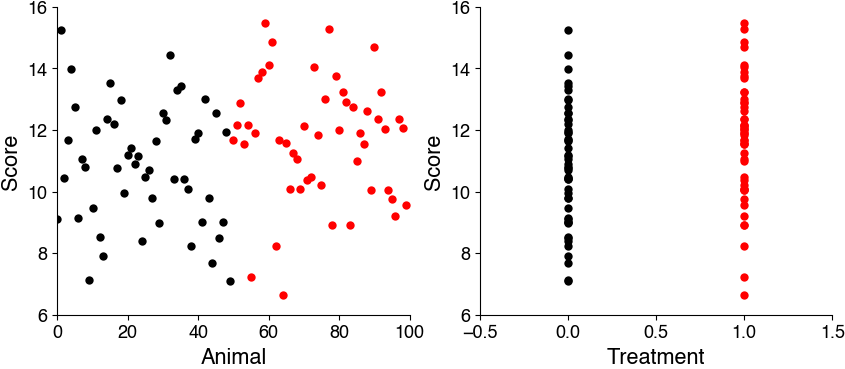

In [20]:
# your solution here
ds1 = np.loadtxt('dat/5.03_inferential_stats_design1b.csv', delimiter=',')

control = ds1[ds1[:,1]==0]
experiment = ds1[ds1[:,1]==1]

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(control[:,0], control[:, 2], 'ok')
plt.plot(experiment[:,0], experiment[:, 2], 'or')
plt.xlabel('Animal')
plt.ylabel('Score')

plt.subplot(122)
plt.plot(control[:,1], control[:, 2], 'ok')
plt.plot(experiment[:,1], experiment[:, 2], 'or')
plt.xlabel('Treatment')
plt.ylabel('Score')
plt.xlim(-0.5, 1.5)
plt.show()

### Plot dataset 2

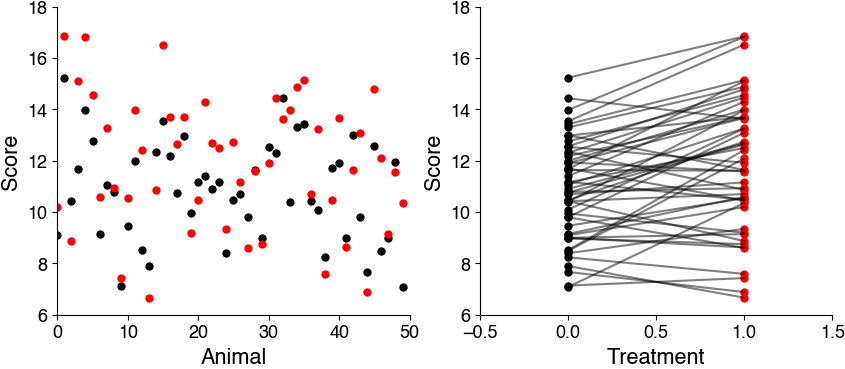

In [25]:
# your solution here
ds2 = np.loadtxt('dat/5.03_inferential_stats_design2b.csv', delimiter=',')

control = ds2[ds2[:,1]==0]
experiment = ds2[ds2[:,1]==1]

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(control[:,0], control[:, 2], 'ok')
plt.plot(experiment[:,0], experiment[:, 2], 'or')
plt.xlabel('Animal')
plt.ylabel('Score')

plt.subplot(122)
plt.plot(control[:,1], control[:, 2], 'ok')
plt.plot(experiment[:,1], experiment[:, 2], 'or')
plt.plot([control[:,1], experiment[:,1]], [control[:, 2], experiment[:,2]], '-k', alpha=0.5)
plt.xlabel('Treatment')
plt.ylabel('Score')
plt.xlim(-0.5, 1.5)
plt.show()

### Are all samples independent? Are they paired or unpaired?

### One-sided or two-sided?

### Is the data normally distributed?
The t-test assumes that the data are normally distributed. This means that the values within each group should follow a normal (Gaussian) distribution.

To check for normality, we visualize the distributions, then run a statistical test. In `scipy.stats`, there are several tests for normality. Use the `scipy.stats.normaltest` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)).


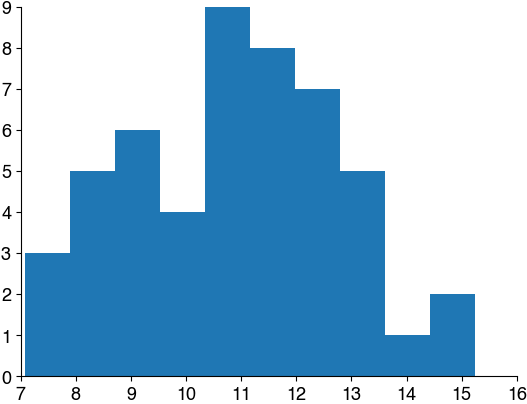

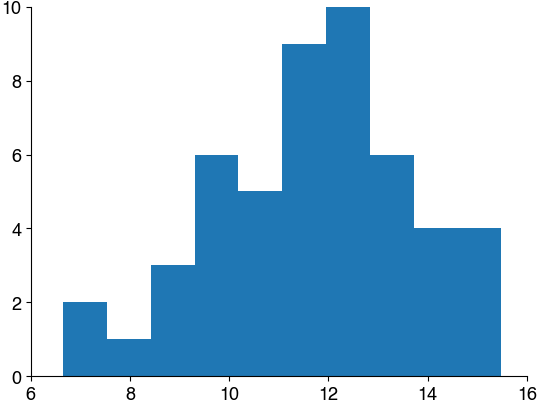

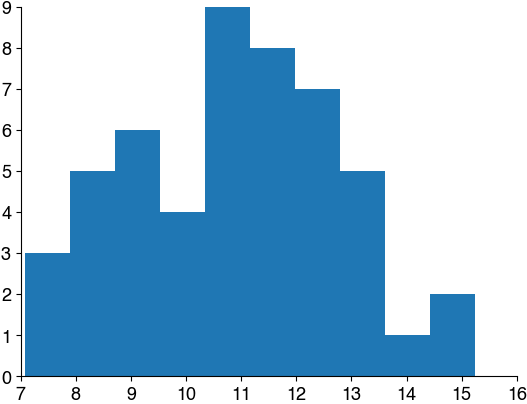

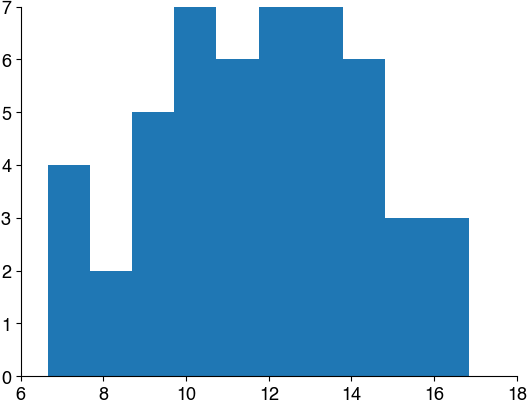

In [35]:
ds1 = np.loadtxt('dat/5.03_inferential_stats_design1b.csv', delimiter=',')

control = ds1[ds1[:,1]==0]
plt.hist(control[:,2])
plt.show()
experiment = ds1[ds1[:,1]==1]
plt.hist(experiment[:,2])
plt.show()


ds1 = np.loadtxt('dat/5.03_inferential_stats_design2b.csv', delimiter=',')

control = ds1[ds1[:,1]==0]
plt.hist(control[:,2])
plt.show()
experiment = ds1[ds1[:,1]==1]
plt.hist(experiment[:,2])
plt.show()



### Mini exercise: Test for normality
Do we run the test on the full dataset? Or on the individual groups (treatment and control) separately?

How do we interpret the p-values? What's the null hypothesis when we test for normality?

Check the documentation!

In [5]:
# your solution 
0.6, 0.5
0.6, 0.5

### Equal variance?
The standard t-test assumes that the variances within the groups being compared are equal (homoscedasticity). In other words, it assumes that the spread or dispersion of the data is consistent across groups. 

Homoscedasticity is typically tested visually - by inspecting the data distributions - and rarely tested in practice. 
There do exist tests that compare the variance across multiple groups, like the Levene test (`scipy.stats.levene`).

However, homoscedasticity is not a hard criterion, since there exists a variant of the t-test - Welch's t-test - that accounts for unequal variance (heteroscedasticity). If possible, use a test that is robust to heteroscedasticity, like Welch's the t-test.

### Mini Exercise: Run the tests
We now know all we need to know about our samples to select the correct test:
- paired or unpaired: no
- normal: yes
- homoscedasticity: ?
- one/two-sided: one

Check the docs to figure out how to use the correct test and how to interpret what is returned:
- unpaired (independent):
    - parametric: `scipy.stats.ttest_ind` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html))
    - non-parametric (for non-normal data): `scipy.stats.mannwhitneyu` ([docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html))
- paired (or related):
    - parametric: `scipy.stats.ttest_rel` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html))
    - non-parametric (for non-normal data): `scipy.stats.wilcoxon` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html))

In [41]:
# your solution here

ds1 = np.loadtxt('dat/5.03_inferential_stats_design1b.csv', delimiter=',')

control = ds1[ds1[:,1]==0]
experiment = ds1[ds1[:,1]==1]

print(scipy.stats.ttest_ind(control[:,2], experiment[:,2], equal_var=False))

ds1 = np.loadtxt('dat/5.03_inferential_stats_design2b.csv', delimiter=',')

control = ds1[ds1[:,1]==0]
experiment = ds1[ds1[:,1]==1]

print(scipy.stats.ttest_rel(control[:,2], experiment[:,2]))

TtestResult(statistic=np.float64(-2.1285895327256186), pvalue=np.float64(0.03579565307532791), df=np.float64(97.99549218444012))
TtestResult(statistic=np.float64(-4.609821463771556), pvalue=np.float64(2.90608812896104e-05), df=np.int64(49))


#### If you want to compare more than two groups

First, detect group-level effects using 
- Anova: `scipy.stats.f_oneway`
- non-parameteric alternative: Kruskal-Wallis test `scipy.stats.kruskal`

If p<0.05, there exist a difference between the groups.

To then detect which groups are different, you run a post hoc test:

`scipy.stats.tukey_hsd` or `scipy.stats.dunnett`

You will do this in one of the bonus exercises.